In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

import squidpy as sq
from bin import load_bgi as ld
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sc.settings.verbosity = 3

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.rcParams['figure.figsize']=(7,4)

In [2]:
def calculate_composition(adata, groupby_key, category_key):
    data = pd.DataFrame(adata.obs)
    composition = data.groupby(groupby_key)[category_key].value_counts(normalize=True).unstack(fill_value=0)
    return composition


def plot_composition(composition_df, title, x, y, palette='viridis'):
    if isinstance(palette, str):
        cmap = plt.get_cmap(palette)
        colors = cmap(np.linspace(0, 1, composition_df.shape[1]))
    elif isinstance(palette, list):
        colors = palette
    else:
        raise ValueError("Palette should be a string (colormap name) or a list of colors")
    
    ax = composition_df.plot(kind='bar', stacked=True, figsize=(6, 4), color=colors, fontsize=8)
    
    plt.title(title)
    plt.ylabel('Proportion')
    plt.xlabel(x)

    plt.legend(title=y, bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.despine()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    plt.tight_layout()
    plt.show()

In [3]:
import json
with open("./marker_stage1.json", "r") as json_file:
    marker_stage1 = json.load(json_file)
with open("./marker_stage2.json", "r") as json_file:
    marker_stage2 = json.load(json_file)

In [4]:
def to_mouse_gene(gene_name_list):
    return [gene_name[0] + gene_name[1:].lower() for gene_name in gene_name_list]

In [5]:
from collections import defaultdict
marker_dict = defaultdict(list)
for key in marker_stage1.keys():
    marker_dict[key].extend(marker_stage1[key])
for key in marker_stage2.keys():
    marker_dict[key].extend(marker_stage2[key])
for key, value in marker_dict.items():
    marker_dict[key] = list(set(marker_dict[key]))
dict_ref = {
    "NK": ["NK"], 
    "T": ["T"], 
    #"B": ["B", "Plasma"], 
    #"Neutrophils": ["Neutrophils"],
    "Macrophages": ["Macrophages","Monocyte"],
    "DC": ["DC"],
    "Endothelial":["Endothelial"],
    "Fibroblast": ["Fibroblasts","Myofibroblast"],
    'MuscleCell':["SmoothMuscle"],
    "Epithelial": [ "Malignant", "Epithelial"],
    "Hepatocytes": ["Hepatocytes/cholangiocytes"]}
epithelial_marker_2 = {
    # "Arterial": ["SOX17", "EFNB2", "GJA5", "DKK2", "FBLN5", "HEY1", "IGFBP3"],  "Postcapillary vains": ["ACKR1", "SELP", "VCAM1"], "Capillaries": ["CA4", "CD36", "IL7R", "AFF3", "BTNL9"],
    # "Epithelial": ['PIGR', 'PHGR1', 'ITM2C', 'MT1E', 'CA2', 'MT1G', 'MT2A', 'VSIG2', 'TSPAN1', 'FABP1', 'MT1M', 'PLAC8', 'FCGBP', 'PKIB', 'GUCA2A', 'MT1F', 'LYPD8', 'PADI2', 'MT1H', 'MUC4', 'ZG16', 'FABP2', 'PLA2G2A', 'B3GNT7', 'GUCA2B', 'CEACAM7', 'BCAS1', 'CA4', 'SLC4A4', 'UGT2B17', 'XIST', 'CHP2', 'CA1', 'C2orf88', 'CPM', 'DHRS9', 'HRCT1', 'HSD17B2', 'CD177', 'ENTPD8', 'B3GALT5', 'CLCA4', 'ADH1C', 'SLC26A3', 'NXPE4', 'GPT', 'SCIN', 'ITLN1', 'CA7', 'SLC16A9', 'MS4A12', 'SPIB', 'SCNN1B', 'SLC17A4', 'NEURL1', 'CTSE', 'BEST4', 'OTOP2', 'REP15', 'NR3C2', 'ADTRP', 'AKR1B10', 'SI', 'SPINK5', 'AQP8', 'BTNL8', 'SLC51B', 'MMP28', 'CLCA1', 'TPSG1', 'EDN3', 'CLDN8', 'LGALS9B', 'TMIGD1', 'GPAT3', 'CPNE8', 'LGALS9C', 'LAMA1', 'RNF152', 'C11orf86', 'LDHD', 'TMEM236', 'BEST2', 'SULT1A2', 'HRASLS2', 'ABCG2', 'SCGB2A1', 'SLCO2A1', 'TMEM82', 'BMP3', 'KCNMA1', 'CEACAM3', 'TBX10', 'FAM177B', 'MYOM1', 'FSIP2', 'MEIS1', 'UGT2B15', 'SLC28A2', 'B3GNT6'],
    "Epithelial":['EPCAM'],
    "Malignant": ['ASCL2', 'TGFBI', 'NKD1', 'DPEP1', 'BMP4', 'GNG4', 'DACH1', 'CLDN1', 'KRT23', 'ETV4', 'SP5', 'NOTUM', 'TESC', 'TDGF1', 'FOXQ1', 'APCDD1', 'C2', 'SNTB1', 'GPR155', 'SLC7A5', 'SLC29A1', 'LGR5', 'BAMBI', 'MTRNR2L12', 'MATR3', 'COL9A3', 'DEFA5', 'CAB39L', 'MTRNR2L8', 'ACSL6', 'PLCB1', 'FKBP10', 'CEMIP', 'FZD10', 'DEFA6', 'PEG10', 'PTP4A3', 'KIZ', 'KRT5', 'PLTP', 'ETV5', 'CST1', 'BMP7', 'WFS1', 'GAL', 'STXBP1', 'CELF3', 'GLIPR1', 'CEL', 'NR2F1', 'SEMA3A', 'FILIP1L', 'CYP2W1', 'LEF1', 'BOP1', 'SMOC2', 'MUCL1', 'FGF20', 'PACSIN3', 'EDAR', 'IGF2BP3', 'RBMS1', 'GAD1', 'TNFRSF19', 'PROCR', 'TGFBR3', 'LGR6', 'ABHD12B', 'CXCL14', 'VGF', 'MEX3A', 'OSR2', 'NRCAM', 'INHBB', 'FAM89A', 'NKD2', 'STMN3', 'DEPDC7', 'STC2', 'LAMA5', 'KCNMB4', 'DKK4', 'CKMT2', 'TMEM154', 'CAPN6', 'FADS1', 'PLAG1', 'DLX3', 'FBLN1', 'MSX1', 'FOXD1', 'TMEM132C', 'BAG2', 'OLFML3', 'TIMP3', 'UPK1A', 'SMIM3', 'CELF4', 'FGF19', 'PALD1'],
}
marker_dict_0 = {}
for new_key, old_keys in dict_ref.items():
    merged_list = []
    for old_key in old_keys:
        merged_list.extend(marker_dict.get(old_key, []))
    marker_dict_0[new_key] = merged_list
for i, j in marker_dict_0.items():
    print(f"Cell type of {i} has {len(j)} markers.")
marker_dict_CC = {key:val for key, val in marker_dict_0.items() if key!="Hepatocytes"}
marker_dict_LM = marker_dict_0

Cell type of NK has 10 markers.
Cell type of T has 65 markers.
Cell type of Macrophages has 31 markers.
Cell type of DC has 25 markers.
Cell type of Endothelial has 8 markers.
Cell type of Fibroblast has 10 markers.
Cell type of MuscleCell has 10 markers.
Cell type of Epithelial has 45 markers.
Cell type of Hepatocytes has 10 markers.


In [29]:
marker_dict_CC['Macrophages']

['Ccr2',
 'Fcgr1a',
 'Fcgr3b',
 'Cd86',
 'Ms4a4a',
 'Cd81',
 'Aif1',
 'C1qb',
 'Il1b',
 'Igsf6',
 'Fcgr3a',
 'C1qa',
 'Msr1',
 'Cd68',
 'Csf1r',
 'Cd14',
 'Marco',
 'Adgre1',
 'Cd163',
 'Itgax',
 'Trem2',
 'Cd33',
 'Itgam',
 'Arg1',
 'Ptprc',
 'C1qc',
 'Cfp',
 'Fcn1',
 'S100a8',
 'Cd14',
 'Lyz']

In [6]:
sig_dict={
    'SPP1+IL1+ macro':['IL1B', 'CXCL8', 'SOD2', 'BCL2A1', 'CXCL2', 'CCL20', 'CXCL3', 'G0S2', 'C15orf48', 'PLAUR', 'EREG', 'IL1RN', 'TIMP1', 'BTG1', 'CD44', 'CCL3', 'PTGS2', 'NAMPT', 'SLC25A37', 'AQP9', 'SLC2A3', 'IL1A', 'TREM1', 'TNFAIP6', 'SERPINB9', 'INHBA', 'EHD1', 'S100A8', 'VCAN', 'NFKB1', 'GK', 'NLRP3', 'TNIP3', 'CCL4L2', 'IL6', 'S100A12', 'TNIP1', 'CD300E', 'CXCL1', 'FLT1', 'THAP2', 'AREG', 'SERPINB2', 'TRAF1', 'CXCL5', 'SLC7A5', 'IRAK2', 'ANGPTL4', 'F3', 'CDC42EP3', 'IL23A', 'DNAAF1', 'MAP4K4', 'ITGB8', 'PTX3', 'TRGC1', 'IL1R1', 'TNFSF14', 'SLCO4A1', 'CRADD', 'AK4', 'SLC7A11', 'HS3ST3B1', 'SLAMF1', 'MSC', 'MFSD2A', 'HILPDA', 'TNFSF15', 'TM4SF1', 'ADAM19', 'CSF3', 'LAMB3', 'NT5E', 'ZP3', 'ZNF697', 'GJB2', 'ACKR3', 'ECE1', 'HEY1', 'TMEM158', 'PRDM8', 'TRGC2', 'FAM124A', 'C6orf223', 'SYN1', 'EDN1', 'GGT5', 'TRGV5', 'NEU4', 'DGAT2', 'MET', 'CEMIP', 'S1PR3', 'ELOVL7', 'MN1', 'HAS1', 'ADGRG3', 'PTGES', 'C16orf74', 'MGAM'],
    'SPP1+TREM2+ macro':['S100A6', 'LGALS1', 'S100A10', 'FABP5', 'CSTB', 'SPP1', 'FBP1', 'LSP1', 'CD9', 'CD52', 'GCHFR', 'S100A9', 'GLIPR2', 'APOC1', 'S100A8', 'CYP27A1', 'FN1', 'MGST1', 'SDC2', 'LPL', 'MATK', 'RETN', 'HSD3B7', 'CCL7', 'CHI3L1', 'TM4SF19', 'CST6', 'PPARG', 'HAMP', 'SEMA3C', 'DCSTAMP', 'SPOCD1', 'PCOLCE2', 'CHIT1', 'MMP7', 'AGRP', 'PHLDA3', 'JAKMIP2', 'ANKRD29', 'PRSS21', 'TPST1', 'HPGD', 'CES1', 'TIMP3', 'CYP19A1', 'HSD11B1', 'COL22A1', 'PAQR5', 'ADORA2B', 'ACOX2', 'SCG5', 'ALDH1A2', 'FABP4', 'CEBPE', 'SLC28A3', 'CRABP2', 'ASPHD1', 'DNASE2B', 'GPC4', 'FLRT2', 'CNIH3', 'GLDN', 'KCNJ15', 'GOLGA7B', 'MYOZ1', 'UCHL1', 'FBXO15', 'LEP', 'NLRP12', 'SLC22A16', 'WDR86', 'GAL', 'HES2', 'GPR27', 'TIMP4', 'EPHB1', 'PNCK', 'ELANE', 'GPD1', 'PHOSPHO1', 'SLCO4C1', 'PPM1J', 'KLHDC9'],
    'SPP1+MMP+ macro':['C15orf48', 'MMP9', 'MMP12', 'SPP1', 'CXCL8', 'IL7R', 'BAG3', 'SLAMF9', 'SLC7A11', 'CXCL5', 'ENO2', 'SLC2A1', 'TNFRSF9', 'MMP1', 'MMP10', 'COL6A2', 'CYP27B1', 'CA12', 'SIGLEC15', 'TMEM45A', 'ITGB3', 'MUCL1', 'NEURL3', 'CP', 'C1QTNF1', 'AK8', 'CLLU1OS', 'CXCL6', 'FGF11', 'LAD1', 'TMEM132A', 'RNF207', 'GPR68', 'MYO1B', 'FJX1', 'CACNA1G', 'A4GALT', 'HTRA3', 'PPP1R1A', 'CD1A', 'COL27A1', 'ACTRT3', 'CRYAB', 'LAYN', 'NELL2', 'ADAMTS14', 'TGFBR3L', 'RTN4RL2', 'CGA', 'MT3', 'CCDC74A', 'RNF32', 'KISS1R'],
    'FOLR2+ macro':['C1QA', 'C1QB', 'MS4A6A', 'C1QC', 'SLC40A1', 'FOLR2', 'PDK4', 'MAF', 'MS4A7', 'GPR34', 'HLA-DQA1', 'SDC3', 'FGL2', 'CXCL12', 'CD163', 'CD302', 'LILRB5', 'SLCO2B1', 'CD5L', 'P2RY13', 'VCAM1', 'MPEG1', 'AXL', 'FRMD4B', 'LYVE1', 'WWP1', 'CETP', 'EPB41L2', 'LTC4S', 'METTL7A', 'DST', 'FRMD4A', 'SLC9A9', 'GATM', 'F13A1', 'IGF1', 'RGL1', 'TCF4', 'TMEM37', 'SESN1', 'NFIA', 'PDGFC', 'GPR155', 'CFP', 'ME1', 'RGS18', 'SCN1B', 'ATP6V0C', 'NDST3', 'CR1', 'MAN2B1', 'ITLN1', 'CLIC2', 'CD163L1', 'ADGRG6', 'FILIP1L', 'CD209', 'SESN3', 'RBP7', 'EBI3', 'ADORA3', 'GFRA2', 'MYO9A', 'KCNJ2', 'IGFBP4', 'SLC46A3', 'CYSLTR1', 'ITSN1', 'STON2', 'GCNT1', 'ALB', 'QPRT', 'EPS8', 'CPED1', 'IGSF21', 'NFATC2', 'RND3', 'TXNDC16', 'ITGAD', 'GIMAP5', 'EXT1', 'ITGA9', 'GIMAP8', 'CDH5', 'RAB3IL1', 'TIMD4', 'CNRIP1', 'HDAC9', 'SLC46A1', 'SIGLEC11', 'KCNAB1', 'HPGDS', 'SHE', 'PIK3R3', 'TBC1D4', 'SRGAP3', 'PROS1', 'FEZ1', 'TMEM26', 'CTSF'],
    'CXCL9+ macro': ['ISG15', 'IFITM3', 'CXCL10', 'GBP1', 'LY6E', 'ISG20', 'IFI6', 'TNFSF13B', 'LAP3', 'WARS', 'EPSTI1', 'TNFSF10', 'STAT1', 'MX1', 'IFIT3', 'VAMP5', 'TAP1', 'IFI35', 'GBP4', 'GBP5', 'IFI44L', 'PPA1', 'IFIT2', 'RSAD2', 'IRF7', 'MX2', 'IFIT1', 'APOBEC3A', 'CXCL11', 'ANKRD22', 'SAMD9L', 'OAS2', 'GCH1', 'IDO1', 'IFIH1', 'CXCL9', 'OAS3', 'HERC5', 'NT5C3A', 'SP110', 'CMPK2', 'OASL', 'FCN1', 'IFITM1', 'SLAMF7', 'HAPLN3', 'CCL8', 'LILRA5', 'USP18', 'DDX58', 'APOL3', 'ETV7', 'DEFB1', 'CD274', 'FPR2', 'IL27', 'LMNB1', 'SELL', 'GMPR', 'HELZ2', 'HESX1', 'NEXN', 'HSH2D', 'HERC6', 'LAMP3', 'CLEC4D', 'ADAM19', 'MEFV', 'ZBP1', 'EXOC3L1', 'CCR2', 'UBD', 'BCL2L14', 'CASP5', 'STAP1', 'BATF2', 'APOBEC3B', 'TGM1', 'FFAR2', 'GBP7', 'ATP10A', 'CCL19', 'STEAP4', 'NTNG2', 'IDO2', 'RUFY4', 'KCTD14', 'NPFFR1']
}

In [ ]:
sig_dict= {'SPP1+IL1+ macro': ['IL1B', 'CXCL8', 'SOD2', 'BCL2A1', 'CXCL2', 'CCL20', 'CXCL3', 'G0S2', 'C15orf48', 'PLAUR', 'EREG', 'IL1RN', 'TIMP1', 'BTG1', 'CD44', 'CCL3', 'PTGS2', 'NAMPT', 'SLC25A37', 'AQP9', 'SLC2A3', 'IL1A', 'TREM1', 'TNFAIP6', 'SERPINB9', 'INHBA', 'EHD1', 'S100A8', 'VCAN', 'NFKB1', 'GK', 'NLRP3', 'TNIP3', 'CCL4L2', 'IL6', 'S100A12', 'TNIP1', 'CD300E', 'CXCL1', 'FLT1', 'THAP2', 'AREG', 'SERPINB2', 'TRAF1', 'CXCL5', 'SLC7A5', 'IRAK2', 'ANGPTL4', 'F3', 'CDC42EP3', 'IL23A', 'DNAAF1', 'MAP4K4', 'ITGB8', 'PTX3', 'TRGC1', 'IL1R1', 'TNFSF14', 'SLCO4A1', 'CRADD', 'AK4', 'SLC7A11', 'HS3ST3B1', 'SLAMF1', 'MSC', 'MFSD2A', 'HILPDA', 'TNFSF15', 'TM4SF1', 'ADAM19', 'CSF3', 'LAMB3', 'NT5E', 'ZP3', 'ZNF697', 'GJB2', 'ACKR3', 'ECE1', 'HEY1', 'TMEM158', 'PRDM8', 'TRGC2', 'FAM124A', 'C6orf223', 'SYN1', 'EDN1', 'GGT5', 'TRGV5', 'NEU4', 'DGAT2', 'MET', 'CEMIP', 'S1PR3', 'ELOVL7', 'MN1', 'HAS1', 'ADGRG3', 'PTGES', 'C16orf74', 'MGAM'],
 'SPP1+TREM2+ macro': ['S100A6', 'LGALS1', 'S100A10', 'FABP5', 'CSTB', 'SPP1', 'FBP1', 'LSP1', 'CD9', 'CD52', 'GCHFR', 'S100A9', 'GLIPR2', 'APOC1', 'S100A8', 'CYP27A1', 'FN1', 'MGST1', 'SDC2', 'LPL', 'MATK', 'RETN', 'HSD3B7', 'CCL7', 'CHI3L1', 'TM4SF19', 'CST6', 'PPARG', 'HAMP', 'SEMA3C', 'DCSTAMP', 'SPOCD1', 'PCOLCE2', 'CHIT1', 'MMP7', 'AGRP', 'PHLDA3', 'JAKMIP2', 'ANKRD29', 'PRSS21', 'TPST1', 'HPGD', 'CES1', 'TIMP3', 'CYP19A1', 'HSD11B1', 'COL22A1', 'PAQR5', 'ADORA2B', 'ACOX2', 'SCG5', 'ALDH1A2', 'FABP4', 'CEBPE', 'SLC28A3', 'CRABP2', 'ASPHD1', 'DNASE2B', 'GPC4', 'FLRT2', 'CNIH3', 'GLDN', 'KCNJ15', 'GOLGA7B', 'MYOZ1', 'UCHL1', 'FBXO15', 'LEP', 'NLRP12', 'SLC22A16', 'WDR86', 'GAL', 'HES2', 'GPR27', 'TIMP4', 'EPHB1', 'PNCK', 'ELANE', 'GPD1', 'PHOSPHO1', 'SLCO4C1', 'PPM1J', 'KLHDC9'],
 'SPP1+MMP+ macro': ['C15orf48', 'MMP9', 'MMP12', 'SPP1', 'CXCL8', 'IL7R', 'BAG3', 'SLAMF9', 'SLC7A11', 'CXCL5', 'ENO2', 'SLC2A1', 'TNFRSF9', 'MMP1', 'MMP10', 'COL6A2', 'CYP27B1', 'CA12', 'SIGLEC15', 'TMEM45A', 'ITGB3', 'MUCL1', 'NEURL3', 'CP', 'C1QTNF1', 'AK8', 'CLLU1OS', 'CXCL6', 'FGF11', 'LAD1', 'TMEM132A', 'RNF207', 'GPR68', 'MYO1B', 'FJX1', 'CACNA1G', 'A4GALT', 'HTRA3', 'PPP1R1A', 'CD1A', 'COL27A1', 'ACTRT3', 'CRYAB', 'LAYN', 'NELL2', 'ADAMTS14', 'TGFBR3L', 'RTN4RL2', 'CGA', 'MT3', 'CCDC74A', 'RNF32', 'KISS1R'],
 'FOLR2+ macro': ['C1QA', 'C1QB', 'MS4A6A', 'C1QC', 'SLC40A1', 'FOLR2', 'PDK4', 'MAF', 'MS4A7', 'GPR34', 'HLA-DQA1', 'SDC3', 'FGL2', 'CXCL12', 'CD163', 'CD302', 'LILRB5', 'SLCO2B1', 'CD5L', 'P2RY13', 'VCAM1', 'MPEG1', 'AXL', 'FRMD4B', 'LYVE1', 'WWP1', 'CETP', 'EPB41L2', 'LTC4S', 'METTL7A', 'DST', 'FRMD4A', 'SLC9A9', 'GATM', 'F13A1', 'IGF1', 'RGL1', 'TCF4', 'TMEM37', 'SESN1', 'NFIA', 'PDGFC', 'GPR155', 'CFP', 'ME1', 'RGS18', 'SCN1B', 'ATP6V0C', 'NDST3', 'CR1', 'MAN2B1', 'ITLN1', 'CLIC2', 'CD163L1', 'ADGRG6', 'FILIP1L', 'CD209', 'SESN3', 'RBP7', 'EBI3', 'ADORA3', 'GFRA2', 'MYO9A', 'KCNJ2', 'IGFBP4', 'SLC46A3', 'CYSLTR1', 'ITSN1', 'STON2', 'GCNT1', 'ALB', 'QPRT', 'EPS8', 'CPED1', 'IGSF21', 'NFATC2', 'RND3', 'TXNDC16', 'ITGAD', 'GIMAP5', 'EXT1', 'ITGA9', 'GIMAP8', 'CDH5', 'RAB3IL1', 'TIMD4', 'CNRIP1', 'HDAC9', 'SLC46A1', 'SIGLEC11', 'KCNAB1', 'HPGDS', 'SHE', 'PIK3R3', 'TBC1D4', 'SRGAP3', 'PROS1', 'FEZ1', 'TMEM26', 'CTSF'],
 'CXCL9+ macro': ['ISG15', 'IFITM3', 'CXCL10', 'GBP1', 'LY6E', 'ISG20', 'IFI6', 'TNFSF13B', 'LAP3', 'WARS', 'EPSTI1', 'TNFSF10', 'STAT1', 'MX1', 'IFIT3', 'VAMP5', 'TAP1', 'IFI35', 'GBP4', 'GBP5', 'IFI44L', 'PPA1', 'IFIT2', 'RSAD2', 'IRF7', 'MX2', 'IFIT1', 'APOBEC3A', 'CXCL11', 'ANKRD22', 'SAMD9L', 'OAS2', 'GCH1', 'IDO1', 'IFIH1', 'CXCL9', 'OAS3', 'HERC5', 'NT5C3A', 'SP110', 'CMPK2', 'OASL', 'FCN1', 'IFITM1', 'SLAMF7', 'HAPLN3', 'CCL8', 'LILRA5', 'USP18', 'DDX58', 'APOL3', 'ETV7', 'DEFB1', 'CD274', 'FPR2', 'IL27', 'LMNB1', 'SELL', 'GMPR', 'HELZ2', 'HESX1', 'NEXN', 'HSH2D', 'HERC6', 'LAMP3', 'CLEC4D', 'ADAM19', 'MEFV', 'ZBP1', 'EXOC3L1', 'CCR2', 'UBD', 'BCL2L14', 'CASP5', 'STAP1', 'BATF2', 'APOBEC3B', 'TGM1', 'FFAR2', 'GBP7', 'ATP10A', 'CCL19', 'STEAP4', 'NTNG2', 'IDO2', 'RUFY4', 'KCTD14', 'NPFFR1']}

In [7]:
for marker in marker_dict_0:
    marker_dict_0[marker] = to_mouse_gene(marker_dict_0[marker])
for marker in marker_dict_LM:
    marker_dict_LM[marker] = to_mouse_gene(marker_dict_LM[marker])
for marker in marker_dict_CC:
    marker_dict_CC[marker] = to_mouse_gene(marker_dict_CC[marker])
for marker in marker_stage1:
    marker_stage1[marker] = to_mouse_gene(marker_stage1[marker])
for marker in marker_stage2:
    marker_stage2[marker] = to_mouse_gene(marker_stage2[marker])
for marker in epithelial_marker_2:
    epithelial_marker_2[marker] = to_mouse_gene(epithelial_marker_2[marker])

In [8]:
from skimage.morphology import dilation, square
from tqdm import tqdm

def compute_relative_abundance(adata, dict_use):
    relative_abundances = {}
    for cell_type, markers in tqdm(dict_use.items()):
        avg_expressions = []
        for marker in markers:
            if marker not in adata.var_names:
                continue
            expressed_values = adata[:, marker].X[adata[:, marker].X > 0]
            # Check if there are any expressed values
            if isinstance(expressed_values, np.ndarray):
                num_nonzero = len(expressed_values)
            else:  # Assuming it's a sparse matrix
                num_nonzero = expressed_values.getnnz()
            if num_nonzero > 0:
                avg_expressions.append(np.mean(expressed_values))
            else:
                avg_expressions.append(0)
        relative_abundance = np.log10(sum(avg_expressions) + 1e-10)
        relative_abundances[cell_type] = 1 / relative_abundance
    return relative_abundances

def annotate_cells_stage(marker_dict_use, adata, cells_to_annotate=None):
    WCT = compute_relative_abundance(adata, marker_dict_use)
    annotations = {}
    unannotated_cells = []

    if cells_to_annotate is None:
        cells_to_annotate = adata.obs_names
        data_submatrix = adata.X
    else:
        data_submatrix = adata[cells_to_annotate, :].X

    all_scores = np.zeros((len(cells_to_annotate), len(marker_dict_use)))
    print(all_scores.shape)
    for idx, (cell_type, markers) in enumerate(marker_dict_use.items()):
        valid_markers_indices = [
            adata.var_names.get_loc(marker)
            for marker in markers
            if marker in adata.var_names
        ]
        marker_matrix = data_submatrix[:, valid_markers_indices]
        presence_matrix = (marker_matrix > 0).astype(int)
        scores = presence_matrix.sum(axis=1) * WCT[cell_type]

        all_scores[:, idx] = scores.ravel()
    max_scores = np.max(all_scores, axis=1)
    max_score_indices = np.argmax(all_scores, axis=1)
    cell_types = list(marker_dict_use.keys())
    annotations = np.array(
        [
            cell_types[idx] if score > 0 else "Others"
            for idx, score in zip(max_score_indices, max_scores)
        ]
    )
    unannotated = [cells_to_annotate[i] for i in np.where(annotations == "Others")[0]]
    return dict(zip(cells_to_annotate, annotations)), unannotated

def visualize_results(adata, ax, key="annotations"):
    # Plotting
    cell_types, counts = np.unique(adata.obs[key], return_counts=True)
    ax.bar(cell_types, counts)
    # Annotate each bar with its value
    for i, value in enumerate(counts):
        ax.text(i, value, str(value), ha="center", va="bottom", fontsize=8)
    ax.set_xticks(cell_types)
    ax.set_xticklabels(cell_types, rotation=90)

In [150]:
fdata_2 = ld.load_bin(gem_file="gRNA/B922/cut.combined.D03658A1.merged.sgRNA.gem",
                    bin_size=20,
                    library_id="gRNA")

In [151]:
guide_genes = fdata_2.var_names.str.startswith('sg')
gdata_2 = fdata_2[:, guide_genes].copy()
adata_2 = fdata_2[:, ~np.isin(fdata_2.var_names, guide_genes)].copy()

In [152]:
gdata_2.write_h5ad("./RNA/B922-1.guide.bin_20.h5")
adata_2.write_h5ad("./RNA/B922-1.expr.bin_20.h5")

In [153]:
sc.pp.filter_cells(adata_2, min_genes=1)
adata_2.var["mt1"] = adata_2.var_names.str.startswith("Mt-")
adata_2.var["mt2"] = adata_2.var_names.str.startswith("mt")
adata_2.var["rb"] = adata_2.var_names.str.startswith("Rp")

#adata_2 = adata_2[:, ~adata_2.var["mt1"]].copy()
#adata_2 = adata_2[:, ~adata_2.var["mt2"]].copy()
#adata_2 = adata_2[:, ~adata_2.var["rb"]].copy()
adata_2.layers["counts"] = adata_2.X

In [154]:
sc.pp.normalize_total(adata_2, target_sum=1e4)
sc.pp.log1p(adata_2)

normalizing counts per cell
    finished (0:00:00)


In [9]:
data_list = ["./RNA/B924-1.expr.bin_20.h5", "./RNA/B926-1.expr.bin_20.h5", "./RNA/B922-1.expr.bin_20.h5",
             "./RNA/B924-2.expr.bin_20.h5", "./RNA/B926-2.expr.bin_20.h5", "./RNA/B922-2.expr.bin_20.h5"]
marker = ["1-1", "2-1", "3-1", "1-2", "2-2", "3-2"]
anndata_list = []
for idx, data in enumerate(data_list):
    anndata_ = sc.read_h5ad(data)
    anndata_.obs["marker"] = marker[idx]
    anndata_list.append(anndata_)

In [10]:
combined_data = ad.concat(anndata_list)
combined_data.obs_names_make_unique()

fdata = combined_data.copy()

In [9]:
fdata = sc.read_h5ad('./RNA/spatial.combined.bin20.h5')

In [13]:
from bin import utils
fdata = utils.remove_mito_ribo_hk_lnc_genes(fdata)

In [14]:
annotations, unannotated_cells = annotate_cells_stage(marker_dict_CC, fdata)
print("There are {} cells remaining unannotated.".format(len(unannotated_cells)))

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:54<00:00,  6.82s/it]


(278122, 8)
There are 38176 cells remaining unannotated.


In [15]:
fdata.obs["annotations"] = pd.Series(annotations).astype("category")

In [16]:
adata_epi = fdata[fdata.obs["annotations"] == "Epithelial", :].copy()
annotations, unannotated_cells_stage_1 = annotate_cells_stage(epithelial_marker_2, adata_epi)
annotations_stage_2, unannotated = annotate_cells_stage( {key:val for key, val in marker_stage1.items() if key in ["Malignant", "Epithelial"]}, adata_epi,
                                                        cells_to_annotate=unannotated_cells_stage_1) 

100%|██████████| 2/2 [00:06<00:00,  3.02s/it]


(68687, 2)


100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

(11904, 2)


In [17]:
for idx, ann in annotations_stage_2.items():
    annotations[idx] = ann
adata_epi.obs["anno_1"] = pd.Series(annotations).astype("category")
adata_epi.obs['anno_1'] = np.array(adata_epi.obs['anno_1'])
fdata.obs["annotations"] = np.array(fdata.obs["annotations"])
fdata.obs.loc[adata_epi.obs.index, "annotations"] = adata_epi.obs['anno_1']

fdata.obs["annotations"] = pd.Series(fdata.obs["annotations"]).astype("category")
fdata.obs['annotations'] = fdata.obs['annotations'].cat.reorder_categories(['NK', 'T', 'DC', 'Macrophages', 'Epithelial', 'Malignant', 'Endothelial', 'Fibroblast', 'MuscleCell', 'Others'], ordered = True)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


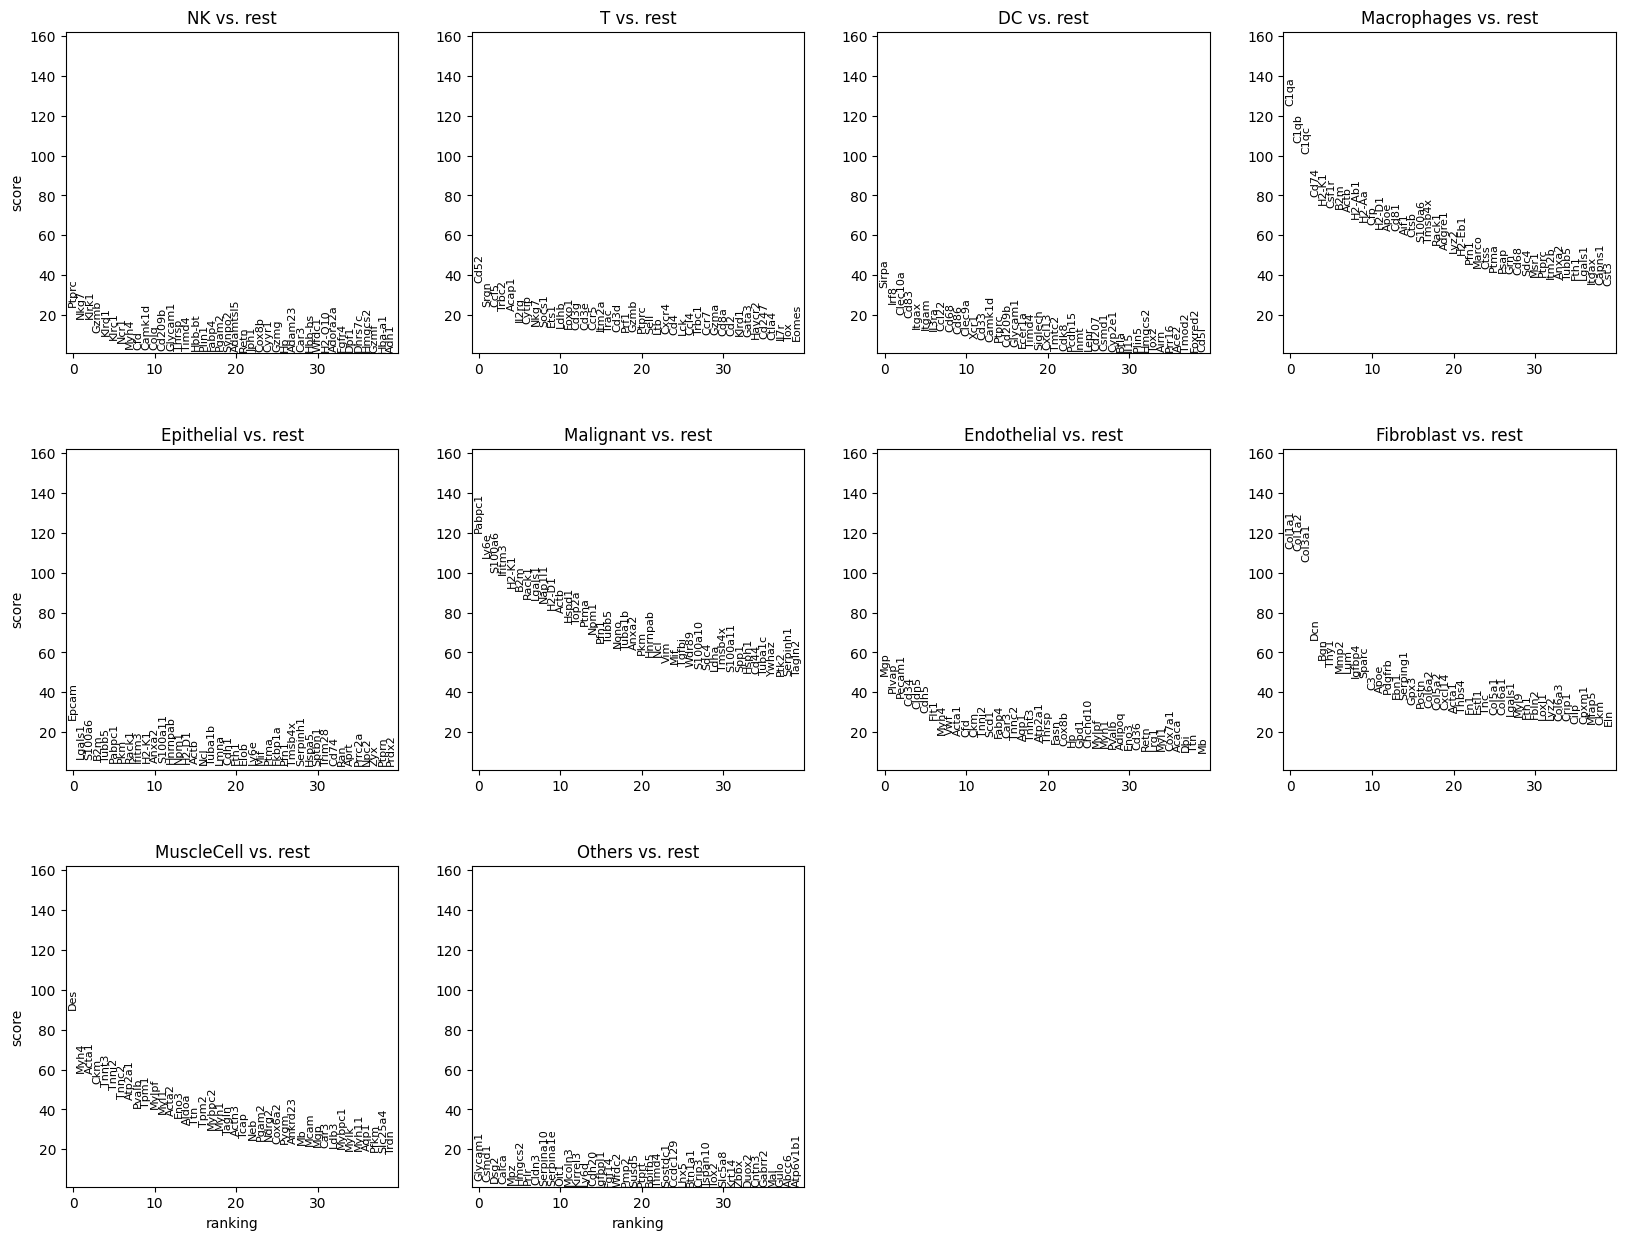

In [18]:
plt.rcParams['figure.figsize']=(5,5)
sc.tl.rank_genes_groups(fdata, groupby='annotations') 
sc.pl.rank_genes_groups(fdata, n_genes=40)

In [160]:
adata_2.write_h5ad("./RNA/B922-1.expr.bin_20.annotation.h5")

In [19]:
T_marker = {
    "memory T": ["Il7r", "Cd27", "Timp1"],
    "effector T": ["Gzmk", "Gzma", "Gzmb", "Prf1", "Nkg7"],
    "exhausted T": ["Havcr2", "Lag3", "Entpd1", "Tigit", "Ctla4", "Layn"],
    "stem-like T": ["Tcf7", "Foxo1"]
}

In [20]:
adata_t = fdata[fdata.obs["annotations"] == "T", :].copy()
annotations, unannotated_cells_stage_1 = annotate_cells_stage(T_marker, adata_t)

100%|██████████| 4/4 [00:00<00:00, 23.24it/s]


(9933, 4)


In [21]:
annotations = {k: ("Unknown T" if v == "Others" else v) for k, v in annotations.items()}
annotations

{'180741': 'Unknown T',
 '225258': 'Unknown T',
 '60313': 'Unknown T',
 '122824': 'Unknown T',
 '149992': 'Unknown T',
 '205183': 'Unknown T',
 '131439': 'Unknown T',
 '291904': 'Unknown T',
 '276705': 'Unknown T',
 '65024': 'effector T',
 '69528': 'Unknown T',
 '255318': 'memory T',
 '283474': 'Unknown T',
 '192269': 'Unknown T',
 '97125': 'effector T',
 '58842': 'Unknown T',
 '259271': 'memory T',
 '217610': 'Unknown T',
 '153996': 'Unknown T',
 '46466': 'Unknown T',
 '91506': 'effector T',
 '68426': 'memory T',
 '45907': 'Unknown T',
 '75188': 'memory T',
 '201300': 'effector T',
 '206372': 'effector T',
 '18331': 'Unknown T',
 '173160': 'memory T',
 '29596': 'Unknown T',
 '51554': 'exhausted T',
 '255926': 'memory T',
 '44239': 'memory T',
 '77456': 'memory T',
 '59441': 'Unknown T',
 '177671': 'memory T',
 '138825': 'stem-like T',
 '110677': 'Unknown T',
 '266071': 'memory T',
 '195135': 'Unknown T',
 '80855': 'stem-like T',
 '245815': 'memory T',
 '187266': 'memory T',
 '154055':

In [22]:
adata_t.obs["anno_1"] = pd.Series(annotations).astype("category")
adata_t.obs['anno_1'] = np.array(adata_t.obs['anno_1'])

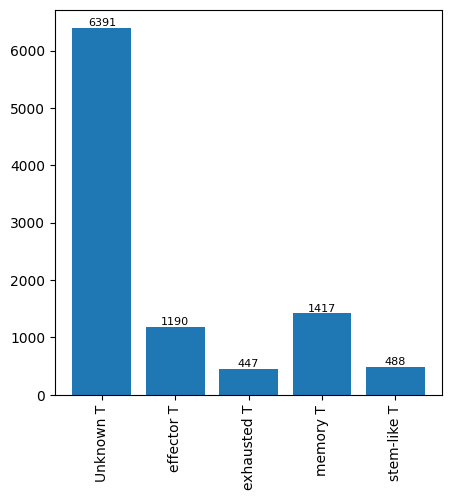

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
visualize_results(adata_t, ax, key="anno_1")

In [24]:
fdata

AnnData object with n_obs × n_vars = 278122 × 13864
    obs: 'marker', 'annotations'
    var: 'mt', 'mt-', 'gm', 'Rb', 'rik'
    uns: 'rank_genes_groups'
    obsm: 'spatial'

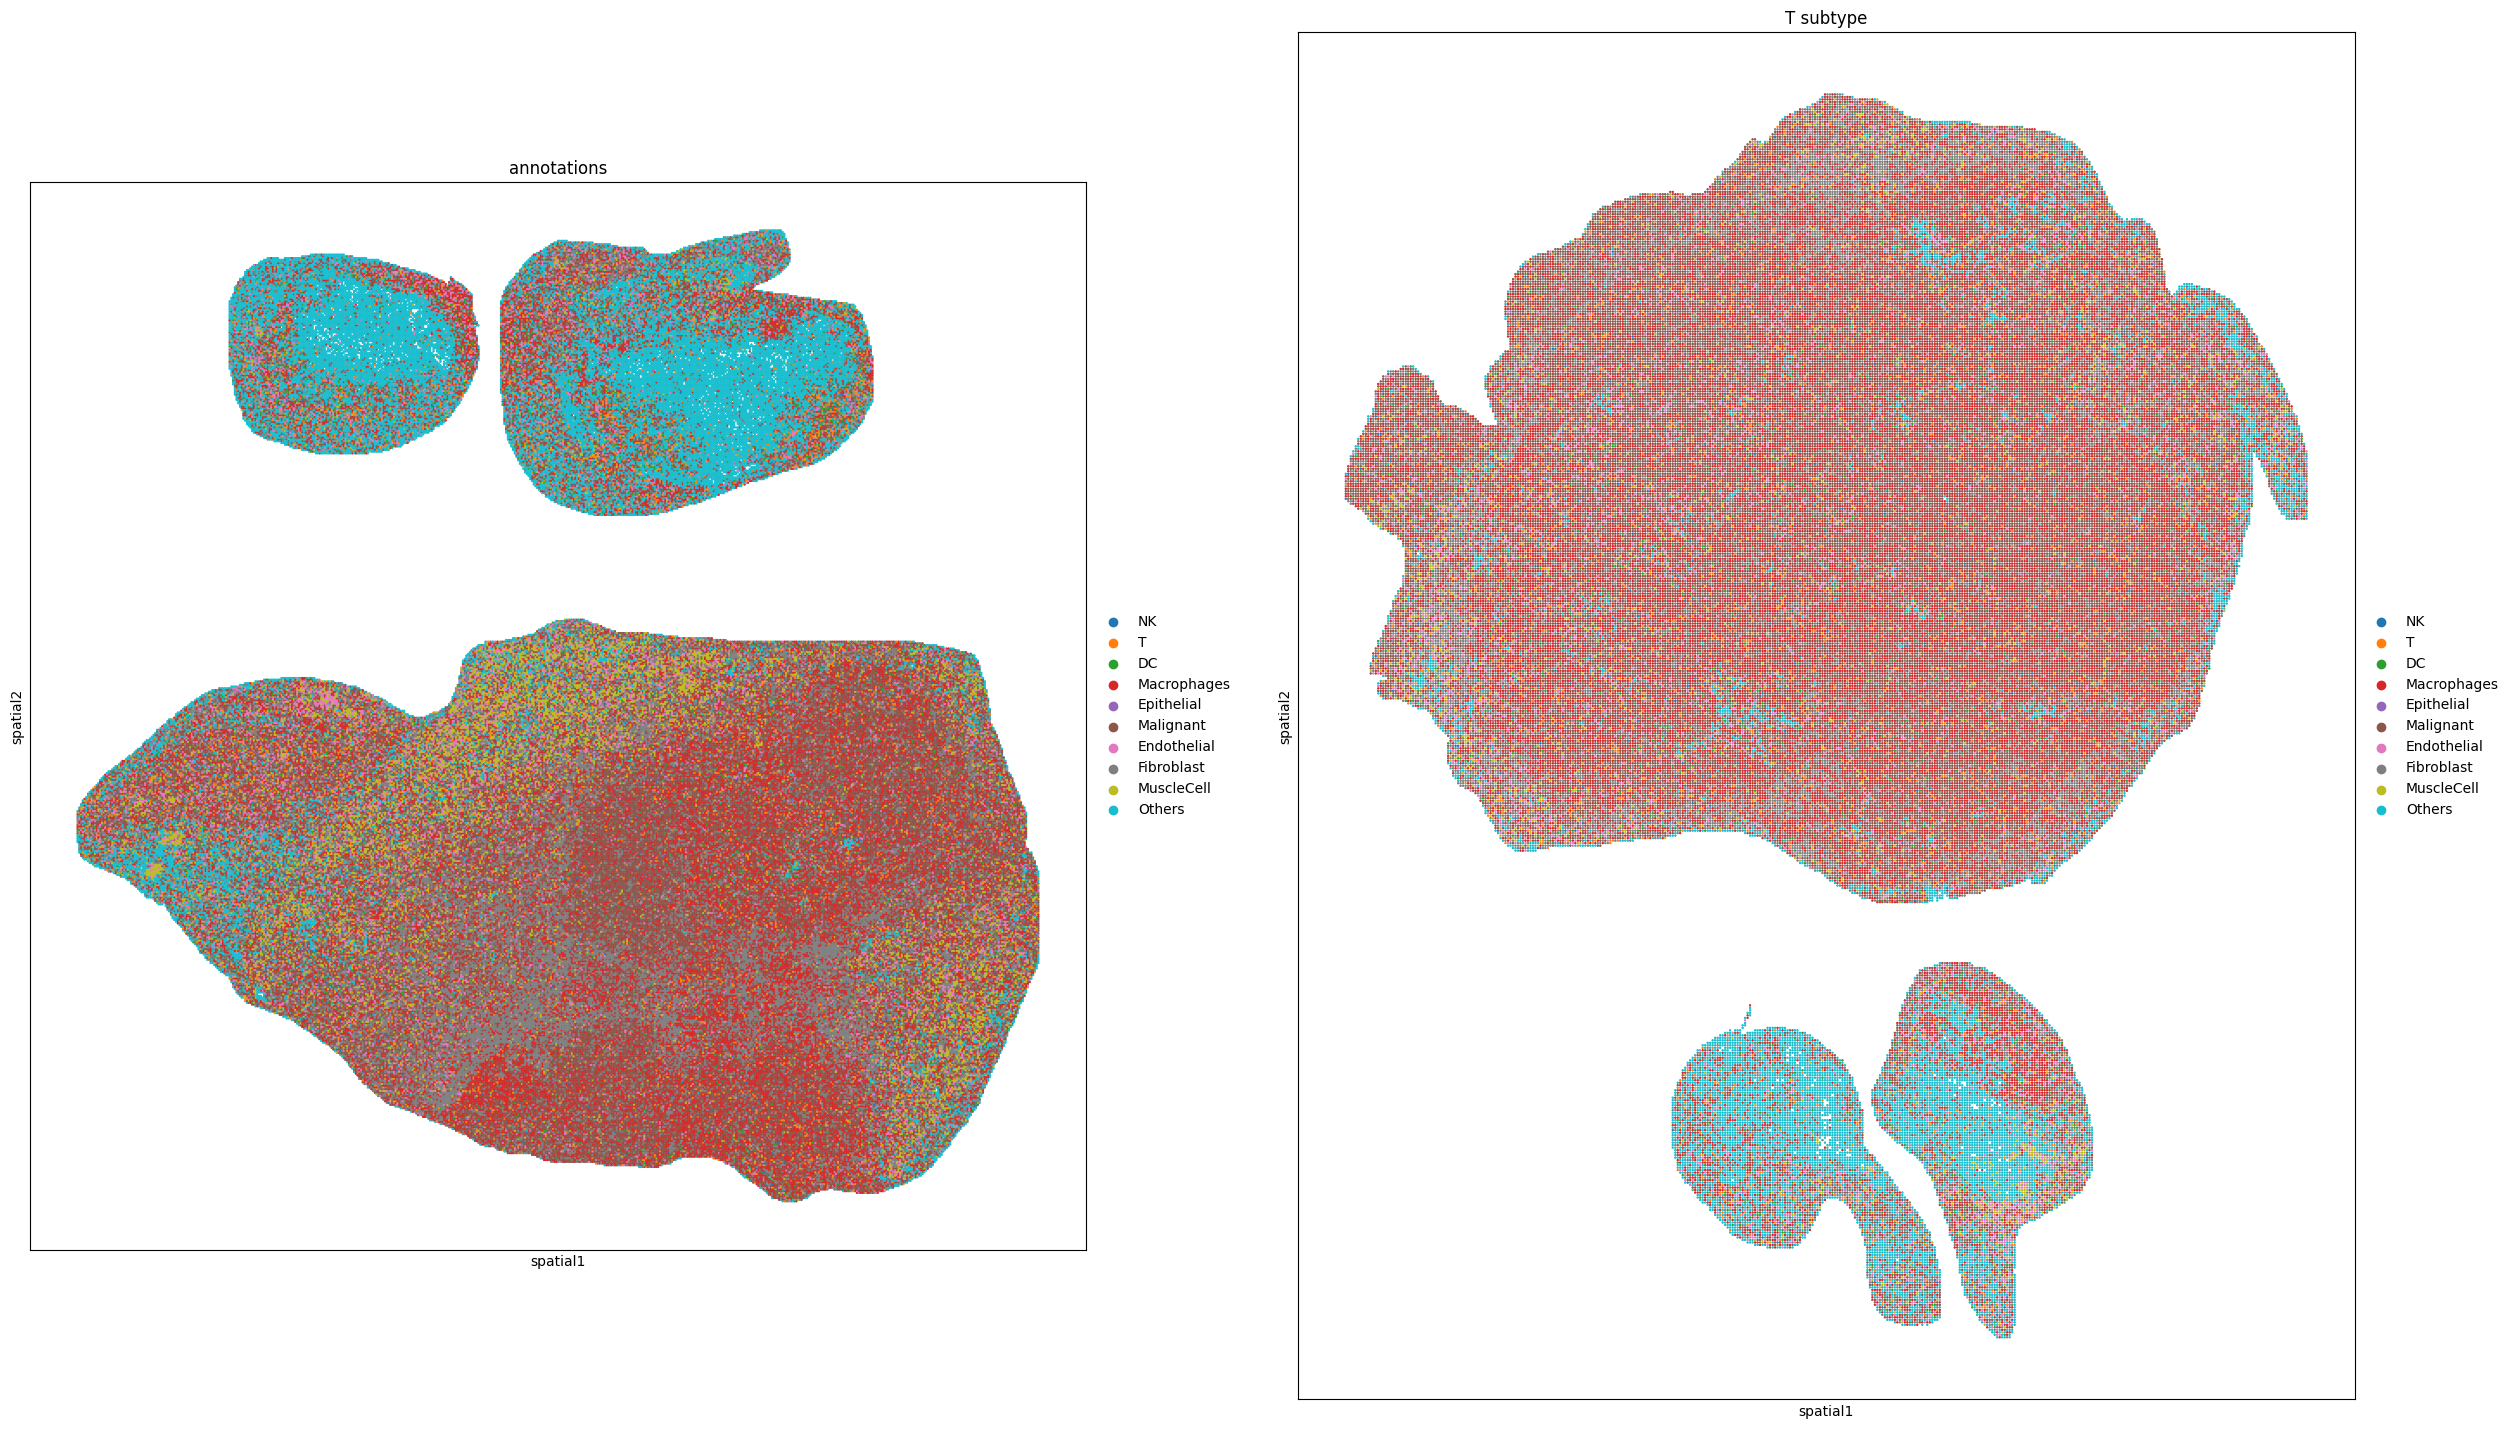

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(30, 20))
for idx, marker in enumerate(np.unique(fdata.obs["marker"])):
    fdata_ = fdata[fdata.obs["marker"] == marker]
    sq.pl.spatial_scatter(fdata_, color="annotations", shape=None, size=1, ax=ax[idx %2])
plt.title("T subtype")
plt.show()

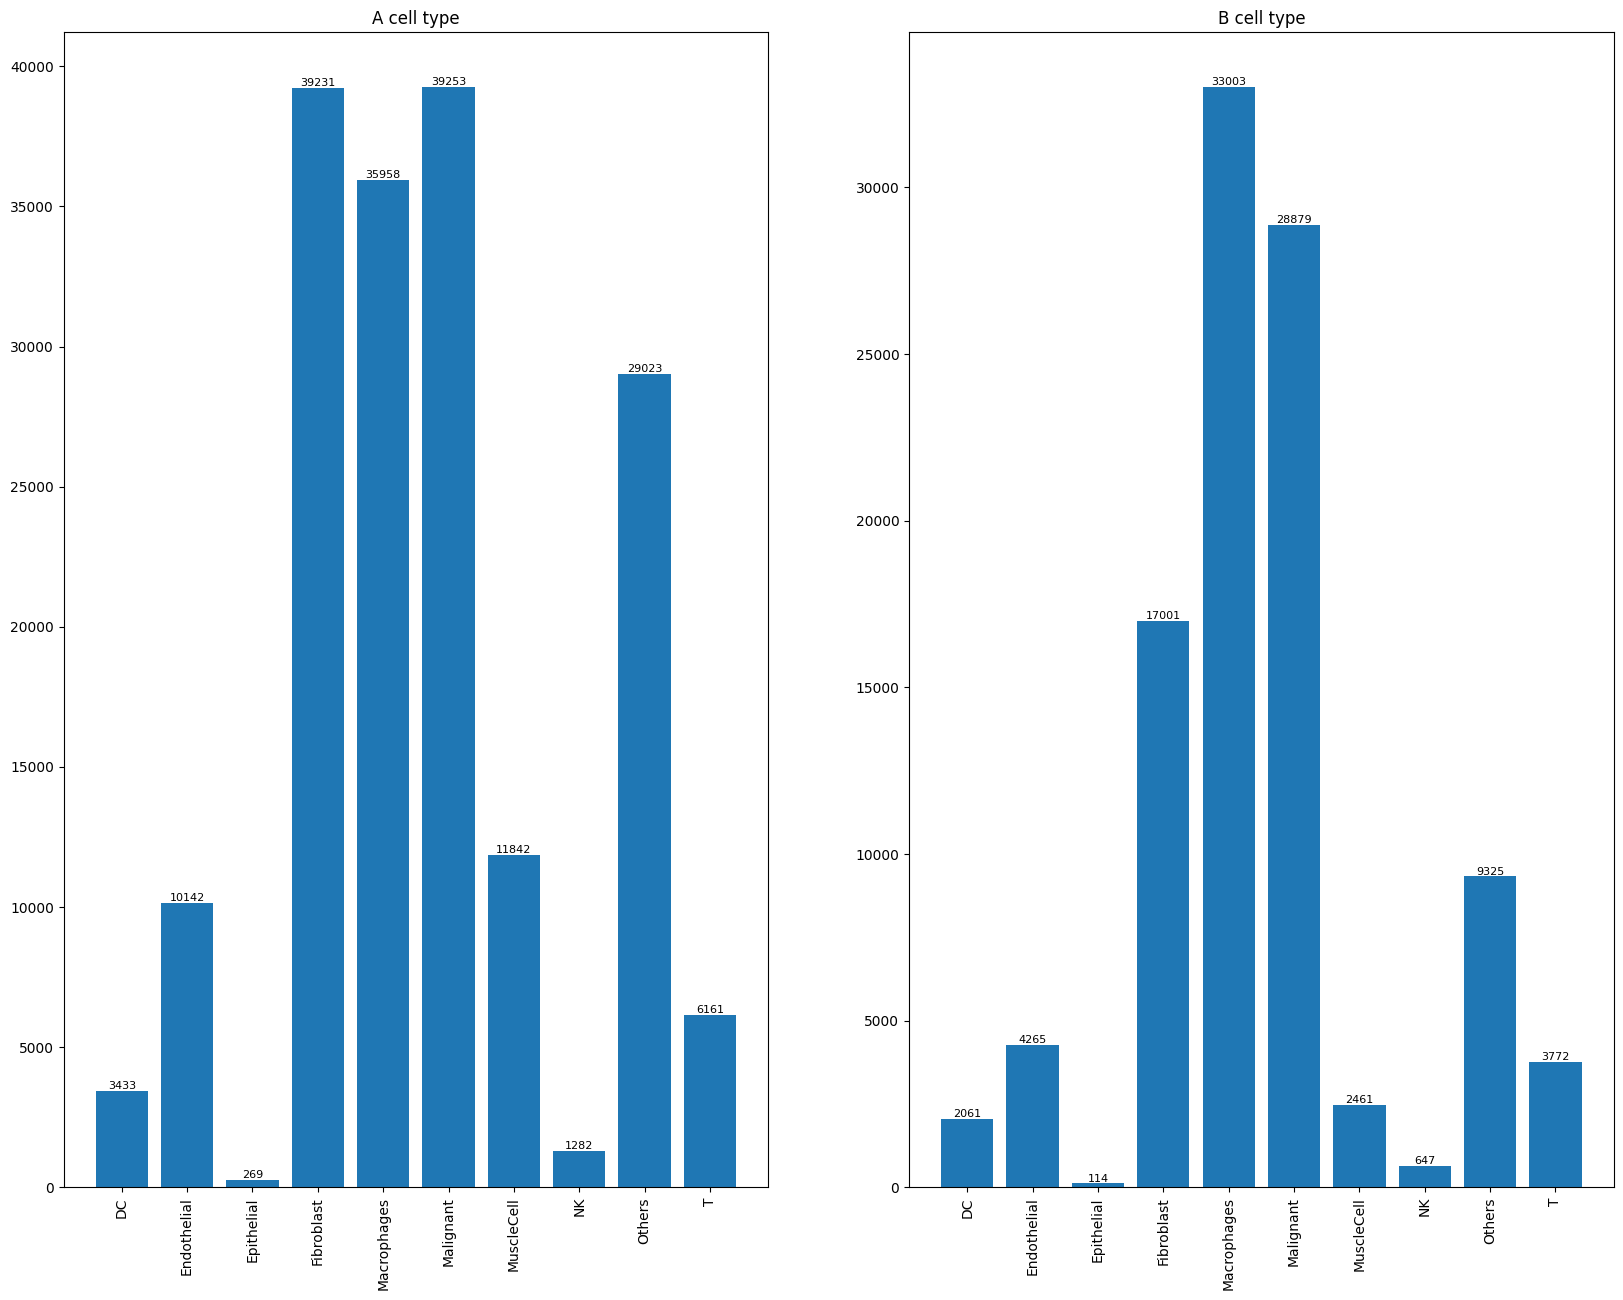

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
for idx, marker in enumerate(np.unique(fdata.obs["marker"])):
    fdata_ = fdata[fdata.obs["marker"] == marker]
    ax_ = ax[idx % 2]
    visualize_results(fdata_, ax_, key="annotations")
    ax_.set_title(marker + " cell type")
plt.show()

In [137]:
np.unique(fdata.obs["annotations"])

array(['DC', 'Endothelial', 'Epithelial', 'Fibroblast', 'Macrophages',
       'Malignant', 'MuscleCell', 'NK', 'Others', 'T'], dtype=object)

In [30]:
fdata.obs["annotations"] = np.array(fdata.obs["annotations"])
fdata.obs.loc[adata_t.obs.index, "annotations"] = adata_t.obs['anno_1']

fdata.obs["annotations"] = pd.Series(fdata.obs["annotations"]).astype("category")
fdata.obs['annotations'] = fdata.obs['annotations'].cat.reorder_categories(['NK', 'effector T', 'stem-like T', 'memory T', 'exhausted T', 'Unknown T', 'DC', 'Macrophages', 'Epithelial', 'Malignant', 'Endothelial', 'Fibroblast', 'MuscleCell', 'Others'], ordered = True)

In [31]:
fdata.write_h5ad("./RNA/spatial.combined.annotation.h5")